<a href="https://colab.research.google.com/github/uri-rizo2/Machine-Learning-CSCI191t/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic challenge w Logistic Regression 

Uriel Amezcua

CSCI 191t
 
11/28/21

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
train_data = pd.read_csv("/train.csv")
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Sex,Survived
0,female,0.742038
1,male,0.188908


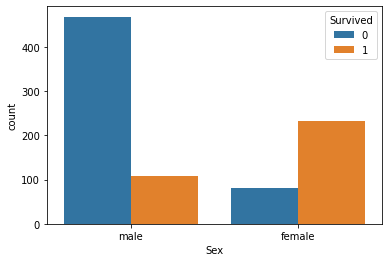

In [25]:
sns.countplot(x=train_data['Sex'], hue=train_data['Survived'])
display(train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


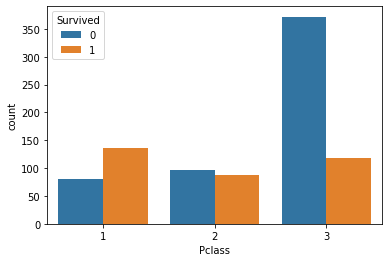

In [26]:
sns.countplot(x=train_data['Pclass'], hue=train_data['Survived'])
display(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

In [27]:
train_data1 = train_data.drop(["PassengerId","Cabin","Name","Ticket","Parch"],axis=1)
train_data1['Embarked'] = train_data1['Embarked'].fillna('C')

In [28]:
train_data1['Sex'].replace('female', 0,inplace=True)
train_data1['Sex'].replace('male', 1,inplace=True)
train_data1['Embarked'].replace('S', 0,inplace=True)
train_data1['Embarked'].replace('C', 1,inplace=True)
train_data1['Embarked'].replace('Q', 2,inplace=True)
train_data1["Age"].fillna("39", inplace = True)

In [29]:
train_data1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22,1,7.2500,0
1,1,1,0,38,1,71.2833,1
2,1,3,0,26,0,7.9250,0
3,1,1,0,35,1,53.1000,0
4,0,3,1,35,0,8.0500,0


In [30]:
train_data1.dropna(inplace=True)
train_data1.isnull().sum()
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 55.7+ KB


In [31]:
x_train = train_data1.drop("Survived",axis=1)
y_train = train_data1["Survived"]

In [32]:
test_data = pd.read_csv("/test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
test_data1 = test_data.drop(["PassengerId","Cabin","Name","Ticket","Parch"],axis=1)
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [34]:
test_data1["Age"].fillna("34", inplace = True)
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    object 
 3   SibSp     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ KB


In [35]:
test_data1["Fare"].fillna("7.75", inplace = True)
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Sex       418 non-null    object
 2   Age       418 non-null    object
 3   SibSp     418 non-null    int64 
 4   Fare      418 non-null    object
 5   Embarked  418 non-null    object
dtypes: int64(2), object(4)
memory usage: 19.7+ KB


In [36]:
test_data1['Sex'].replace('female', 0,inplace=True)
test_data1['Sex'].replace('male', 1,inplace=True)
test_data1['Embarked'].replace('S', 0,inplace=True)
test_data1['Embarked'].replace('C', 1,inplace=True)
test_data1['Embarked'].replace('Q', 2,inplace=True)
x_test = test_data1

In [37]:
log = LogisticRegression()
log.fit(x_train,y_train)
pred = log.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
y_test = pd.read_csv("/gender_submission.csv")
y_test1 = np.array(y_test["Survived"])
accuracy_score(y_test1,pred)

0.9449760765550239

In [39]:
Predictions = pd.DataFrame({'Survived': pred})
Predictions.head(10)

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [40]:
submission= pd.DataFrame({'PassengerId': test_data["PassengerId"],'Survived': Predictions["Survived"]})
submission.info()
submission.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
